In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [3]:
data = pd.read_csv('../data/processed/data_engineered_rizcallah_1122.csv')
data.head()

,Unnamed: 0,quality,is_high_qual,vol_fixed_ratio,prop_citric_acid,sugar_acidity_ratio,sugar_acidity_interaction,chlor_acid_ratio,chlor_fixed_ratio,chlor_vol_ratio,...,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0,5,False,0.094595,0.000000,0.541311,6.669,0.021652,0.010270,0.108571,...,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,1,5,False,0.112821,0.000000,0.812500,8.320,0.030625,0.012564,0.111364,...,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,2,5,False,0.097436,0.005128,0.705521,7.498,0.028221,0.011795,0.121053,...,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,3,6,True,0.025000,0.050000,0.601266,6.004,0.023734,0.006696,0.267857,...,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,4,5,False,0.094595,0.000000,0.541311,6.669,0.021652,0.010270,0.108571,...,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [4]:
data.drop('Unnamed: 0', axis=1, inplace=True)
data.head()

,quality,is_high_qual,vol_fixed_ratio,prop_citric_acid,sugar_acidity_ratio,sugar_acidity_interaction,chlor_acid_ratio,chlor_fixed_ratio,chlor_vol_ratio,prop_free_sulfur,...,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,5,False,0.094595,0.000000,0.541311,6.669,0.021652,0.010270,0.108571,0.323529,...,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,5,False,0.112821,0.000000,0.812500,8.320,0.030625,0.012564,0.111364,0.373134,...,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,5,False,0.097436,0.005128,0.705521,7.498,0.028221,0.011795,0.121053,0.277778,...,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,6,True,0.025000,0.050000,0.601266,6.004,0.023734,0.006696,0.267857,0.283333,...,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,5,False,0.094595,0.000000,0.541311,6.669,0.021652,0.010270,0.108571,0.323529,...,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [5]:
X_features = data.drop(['quality', 'is_high_qual'], axis=1)
y_feature = data['quality']

pca = PCA(n_components=10)
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X_features)
X_pca = pca.fit_transform(X_scaled)


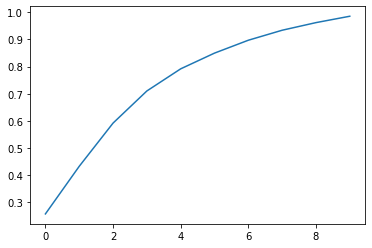

In [6]:
tot_var_exp = np.cumsum(pca.explained_variance_ratio_)
plt.plot(tot_var_exp)

In [81]:
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_feature, test_size = 0.2)

svr = SVR(kernel='linear')

mod_lin = svr.fit(X_train, y_train)

In [82]:
pred = mod_lin.predict(X_test)
pred_rounded = pred.round()
accuracy_score(pred_rounded, y_test)

0.575

In [83]:
svr_rbf = SVR(kernel='rbf')
mod_rbf = svr_rbf.fit(X_train, y_train)

pred_rbf = mod_rbf.predict(X_test)
pred_rbf_rounded = pred_rbf.round()
accuracy_score(pred_rbf_rounded, y_test)

0.621875

In [94]:
svr_poly = SVR(kernel='poly', degree=5)
mod_poly = svr_poly.fit(X_train, y_train)

pred_poly = mod_poly.predict(X_test)
pred_poly_rounded = pred_poly.round()
accuracy_score(pred_poly_rounded, y_test)

0.553125

In [101]:
svr_sigmoid = SVR(kernel='sigmoid', coef0=0.01)
mod_sigmoid = svr_sigmoid.fit(X_train, y_train)

pred_sigmoid = mod_sigmoid.predict(X_test)
pred_sigmoid_rounded = pred_sigmoid.round()
accuracy_score(pred_sigmoid_rounded, y_test)

0.10625

0.546875